In [1]:
import pandas as pd
import numpy as np
import torch
from sentence_transformers import util
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2' ,device="cuda")

pronouns1 = " ".join(["she", "her", "hers"])
pronouns2 = " ".join(["he", "him", "his"])
associations1 = " ".join(["queen", "princess", "woman", "women", "female", "lady", "actress", "girl"])
associations2 = " ".join(["king", "prince", "man", "men", "male", "gentleman", "aactor", "boy"])
relations1 = " ".join(["daughter" ,"sister", "girlfriend", "wife", "mother"])
relations2 = " ".join(["son" ,"brother", "boyfriend", "wife", "father"])

ts1emb = model.encode([pronouns1 , associations1 ,  relations1])
ts2emb = model.encode([pronouns2 , associations2 , relations2])

ts1emb = torch.tensor(np.mean(ts1emb, axis = 0), device= "cuda")
ts2emb = torch.tensor(np.mean(ts2emb, axis = 0), device= "cuda")

ts1e = model.encode("female")
ts2e = model.encode("male")
data = pd.read_csv("data/sexism_data.csv")
# data = pd.read_csv("data/sexism_data.csv")
# data.head(4)

In [4]:
338000 - (61157 + 17706 + 21498 + 5285 + 223338 + 9016)

0

In [2]:
sexist_data = pd.concat([data[data.sexist == True], data[data.sexist == False].sample(n = 1375)])
sexist_data

,id,dataset,text,toxicity,sexist,of_id
10,10,callme,All my sons have grown up with computer games ...,0.091025,True,-1
14,14,scales,Women have more intuition than men.,0.321429,True,-1
30,30,scales,Women do not belong in politics,0.451443,True,-1
45,45,scales,"On the average, men are more arrogant than women",0.530905,True,-1
55,55,scales,A woman will never be truly fulfilled in life ...,0.206631,True,-1
...,...,...,...,...,...,...
9680,9682,other,Not sure if srs. Get rid of Kat and Andre beca...,0.621016,False,-1
13499,13503,other,#mkr if the contestants opened a restaurant: h...,0.098431,False,-1
12854,12858,callme,people that act like they care about sports <<,0.064318,False,4013
734,734,other,MENTION3073 EVERYWOMAN! WITH THE POWER TO EARN...,0.614403,False,-1


In [3]:
sexist_data.index = np.arange(len(sexist_data))
sexist_data = sexist_data[["text", "sexist"]]
sexist_data

,text,sexist
0,All my sons have grown up with computer games ...,True
1,Women have more intuition than men.,True
2,Women do not belong in politics,True
3,"On the average, men are more arrogant than women",True
4,A woman will never be truly fulfilled in life ...,True
...,...,...
3179,Not sure if srs. Get rid of Kat and Andre beca...,False
3180,#mkr if the contestants opened a restaurant: h...,False
3181,people that act like they care about sports <<,False
3182,MENTION3073 EVERYWOMAN! WITH THE POWER TO EARN...,False


In [4]:
sexist_data.rename(columns={"sexist" : "biased"}, inplace=True)
sexist_data

c:\Python_VENVs\dtsci\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,text,biased
0,All my sons have grown up with computer games ...,True
1,Women have more intuition than men.,True
2,Women do not belong in politics,True
3,"On the average, men are more arrogant than women",True
4,A woman will never be truly fulfilled in life ...,True
...,...,...
3179,"And oh boy, did I have a lot of apologies to m...",False
3180,Identifying information is not allowed in many...,False
3181,"MENTION513 NPO can take a year. :\\n""",False
3182,"If life hands you lemons, ask it why it has ha...",False


In [5]:
other_data = pd.read_csv('data/bias_no_bias.csv')
other_data.rename(columns={" bias" : "biased"}, inplace=True)
other_data

,text,biased
0,Women are not suited for leadership positions,1
1,Men are more logical and rational than women,1
2,Women are too emotional to make objective deci...,1
3,Men are better negotiators than women,1
4,Women should focus on family rather than pursu...,1
...,...,...
98,Organizations should ensure that promotion and...,0
99,Employees should be encouraged to challenge an...,0
100,Organizations should actively support the work...,0
101,Employees should have access to resources and ...,0


In [6]:
total_data = pd.concat([sexist_data, other_data], axis=0)
total_data

,text,biased
0,All my sons have grown up with computer games ...,1
1,Women have more intuition than men.,1
2,Women do not belong in politics,1
3,"On the average, men are more arrogant than women",1
4,A woman will never be truly fulfilled in life ...,1
...,...,...
98,Organizations should ensure that promotion and...,0
99,Employees should be encouraged to challenge an...,0
100,Organizations should actively support the work...,0
101,Employees should have access to resources and ...,0


In [7]:
total_data.biased.value_counts()

1    1859
0    1428
Name: biased, dtype: int64

In [39]:
total_data

,text,biased
0,All my sons have grown up with computer games ...,1
1,Women have more intuition than men.,1
2,Women do not belong in politics,1
3,"On the average, men are more arrogant than women",1
4,A woman will never be truly fulfilled in life ...,1
...,...,...
98,Organizations should ensure that promotion and...,0
99,Employees should be encouraged to challenge an...,0
100,Organizations should actively support the work...,0
101,Employees should have access to resources and ...,0


In [37]:
sexist_data.sexist = data.sexist.apply(lambda x : 1 if x == True else 0)

C:\Users\PRASHA~1\AppData\Local\Temp/ipykernel_25308/237339954.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  sexist_data.sexist = data.sexist.apply(lambda x : 1 if x == True else 0)


In [38]:
data.sexist.value_counts()

False    11822
True      1809
Name: sexist, dtype: int64

In [4]:
data1 = data[data.sexist == 1]
data1

,id,dataset,text,toxicity,sexist,of_id
10,10,callme,All my sons have grown up with computer games ...,0.091025,1,-1
14,14,scales,Women have more intuition than men.,0.321429,1,-1
30,30,scales,Women do not belong in politics,0.451443,1,-1
45,45,scales,"On the average, men are more arrogant than women",0.530905,1,-1
55,55,scales,A woman will never be truly fulfilled in life ...,0.206631,1,-1
...,...,...,...,...,...,...
13604,13608,scales,A man shouldn’t have to worry about birth-control,0.073215,1,-1
13605,13609,scales,Men cannot relate to other persons as well as ...,0.141320,1,-1
13607,13611,hostile,"RT MENTION4556 call me sexist, but i hate to h...",0.607978,1,-1
13613,13617,scales,"As head of the household, the father should ha...",0.095359,1,-1


In [5]:
data = pd.concat([data[data.sexist == 0].sample(n = 3_000),  data1])
data

,id,dataset,text,toxicity,sexist,of_id
4371,4373,callme,'I don't think homosapiens should have rights',0.158129,0,-1
8082,8084,other,"""This is really the time to buy in West Oaklan...",0.280775,0,-1
12418,12422,callme,"I'm sorry, I honestly think wrestling is just ...",0.104190,0,5034
1278,1278,hostile,Sucks to have the smile wiped off your own fac...,0.888483,0,-1
155,155,callme,RT MENTION874 the iPhone just doesn't look lik...,0.206132,0,8543
...,...,...,...,...,...,...
13604,13608,scales,A man shouldn’t have to worry about birth-control,0.073215,1,-1
13605,13609,scales,Men cannot relate to other persons as well as ...,0.141320,1,-1
13607,13611,hostile,"RT MENTION4556 call me sexist, but i hate to h...",0.607978,1,-1
13613,13617,scales,"As head of the household, the father should ha...",0.095359,1,-1


In [6]:
data.sexist.value_counts()

0    3000
1    1809
Name: sexist, dtype: int64

In [7]:
data.index = np.arange(len(data))
data.drop(["id"], axis=1, inplace=True)
data

,dataset,text,toxicity,sexist,of_id
0,callme,'I don't think homosapiens should have rights',0.158129,0,-1
1,other,"""This is really the time to buy in West Oaklan...",0.280775,0,-1
2,callme,"I'm sorry, I honestly think wrestling is just ...",0.104190,0,5034
3,hostile,Sucks to have the smile wiped off your own fac...,0.888483,0,-1
4,callme,RT MENTION874 the iPhone just doesn't look lik...,0.206132,0,8543
...,...,...,...,...,...
4804,scales,A man shouldn’t have to worry about birth-control,0.073215,1,-1
4805,scales,Men cannot relate to other persons as well as ...,0.141320,1,-1
4806,hostile,"RT MENTION4556 call me sexist, but i hate to h...",0.607978,1,-1
4807,scales,"As head of the household, the father should ha...",0.095359,1,-1


In [132]:
model.encode(["this is faboulus", "Wow i dished that"]).shape == (384, )

False

In [36]:
import torch
from nltk.tokenize import sent_tokenize
sentence_correlation = lambda s : (util.cos_sim(s, ts1e) - util.cos_sim(s, ts2e)).item()

vt = []
sembeds = []

for i, s in enumerate(data.text):
    tokenized_sents = " ".join(sent_tokenize(str(s)))
    svec = model.encode(tokenized_sents)
    # cbias = 0
    # divfactor = 1
    # imp_vec = torch.zeros((384, ))
    # for vec in svec:
    #     sscore = sentence_correlation(vec)
    #     cbias += sscore
    #     imp_vec += vec
    
    # if svec.shape != (384, ): divfactor = len(svec)
    sscore = sentence_correlation(svec)
    finvec = np.array(svec)
    vt.append(sscore)
    sembeds.append(finvec)

In [19]:
import matplotlib.pyplot as plt

bias_vt = [vt[i] for i in data.index if data.sexist[i] == 0]
bias_vt = np.array(bias_vt)

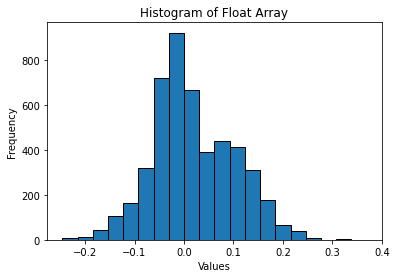

In [17]:
import matplotlib.pyplot as plt


# Plot histogram
plt.hist(vt, bins=20, edgecolor='black')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Float Array')

# Display the plot
plt.show()


19.058823529411764

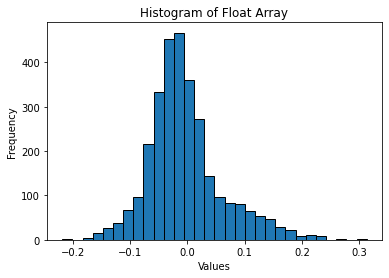

In [21]:
import matplotlib.pyplot as plt


# Plot histogram
plt.hist(bias_vt, bins=30, edgecolor='black')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Float Array')

# Display the plot
plt.show()


In [195]:
import numpy as np

# Sort the data in ascending order
sorted_vt = np.sort(vt)

# Calculate the quantiles for the three segments
quantiles = np.quantile(sorted_vt, [1/3, 2/3])
# Divide the data based on the quantile thresholds
male_vt = sorted_vt[sorted_vt <= quantiles[0]]
neutral_vt = sorted_vt[(sorted_vt > quantiles[0]) & (sorted_vt <= quantiles[1])]
female_vt = sorted_vt[sorted_vt > quantiles[1]]

In [57]:
neu_sep = male_vt.max()
fem_sep = neutral_vt.max()

In [196]:
male_vt.max(), female_vt.min()

(-0.029307067394256592, 0.01965928077697754)

In [150]:
sembeds = np.array(list(sembeds))

C:\Users\PRASHA~1\AppData\Local\Temp/ipykernel_17260/2577509281.py:1: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  sembeds = np.array(list(sembeds))


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (13631,) + inhomogeneous part.

In [158]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

# Assuming you have a list of sentence vectors called 'sentence_vectors'
# Each sentence vector is a 1D numpy array

# Step 1: Compute cosine similarity matrix

# Assuming your vectors are stored in a numpy array called "vectors"
similarity_matrix = cosine_similarity(sembeds)

# Step 2: Perform hierarchical clustering
Z = hierarchy.linkage(similarity_matrix, method='average', metric='cosine')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z)

# Add labels to the plot
plt.xlabel('Sentence Vectors')
plt.ylabel('Cosine Similarity')
plt.title('Dendrogram - Clustering Sentence Vectors based on Cosine Similarity')

# Show the plot
plt.show()


In [10]:
np.unique(cluster_labels)

array([0, 1, 2])

In [11]:
len(cluster_labels)

13631

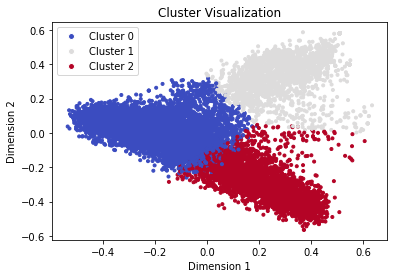

In [14]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# PCA to reduce dimensionality
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(sembeds)

plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], c=cluster_labels, cmap=plt.cm.get_cmap('coolwarm'), marker=".")

unique_labels = np.unique(cluster_labels)
unique_colors = plt.cm.get_cmap('coolwarm')(np.linspace(0, 1, len(unique_labels)))

legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label=f"Cluster {label}", markerfacecolor=color)
    for label, color in zip(unique_labels, unique_colors)
]
plt.legend(handles=legend_elements)

plt.title('Cluster Visualization')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()


In [20]:
s1 = [i for i, label in enumerate(cluster_labels) if label == 0]
s2 = [i for i, label in enumerate(cluster_labels) if label == 1]
s3 = [i for i, label in enumerate(cluster_labels) if label == 2]

In [21]:
len(s1), len(s2), len(s3)

(429, 414, 294)

In [22]:
sembeds = np.array(sembeds)
vt = np.array(vt)

In [23]:
vt[s1].mean(), vt[s2].mean(), vt[s3].mean()

(-0.03565330531921385, 0.10241361726345359, 0.18421211086061537)

In [29]:
for s in data.Sentences[s1]:
    print(s)

Just dress sexy and you will sign any contract.
You can thank the quotas
You are too emotional
High heels are mandatory
Are you planning to have children ?
You're still not married?
You should marry later, it is better for your career
I should kiss you, it would be a shame to deprive myself
I'll explain to you with simple words so that you understand
Fortunately you do not earn more than your boyfriend
Do you feel able to take on this task?
You won't go get us a coffee?
It is a work men
This job is made for all
All candidates are accepted.
If you want this job, think like a man
This outfit suits you well.
It is a good team
Everybody here is competent
All types of people are useful
You are as intelligent as this guy
Great job!
Please Miss be nice and bring us some coffee
It is a good personality
Everyone is treated to their true value
Everyone has the same opportunities
My colleague is an amazing person
Can you give me a report please?
I like your way of thinking
Your work is basic
You 

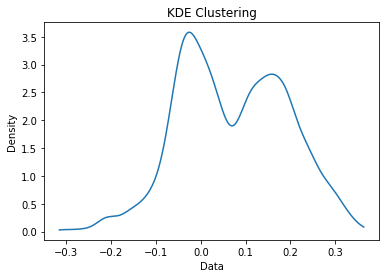

In [85]:
from sklearn.neighbors import KernelDensity

# Prepare your 1D data
reshaped_vt = vt.reshape(-1, 1)
# Create and fit the KDE model
kde = KernelDensity(bandwidth=0.02)  # Adjust the bandwidth parameter as needed
kde.fit(reshaped_vt)

# Generate a set of points along the x-axis for plotting
x = np.linspace(vt.min(), vt.max(), 1000)  # Adjust the number of points as needed
x = x.reshape(-1, 1)

# Compute the log-density scores using the fitted KDE model
log_density = kde.score_samples(x)

# Visualize the clusters
plt.plot(x, np.exp(log_density))
plt.xlabel('Data')
plt.ylabel('Density')
plt.title('KDE Clustering')
plt.show()


In [82]:
from scipy.signal import argrelextrema

minima_indices = argrelextrema(log_density, np.less)[0]
minima_values = log_density[minima_indices]

In [29]:
vt = np.array(vt)

In [83]:
minima_values

array([0.87946764])

In [43]:
vt.sort()
vt

array([-0.31526202, -0.29568693, -0.26562676, ...,  0.34400281,
        0.3510772 ,  0.36352199])

In [55]:
neutral_div_mark = minima_values[1]
female_div_mark = minima_values[2]

In [109]:
np.median(female_vt), np.median(neutral_vt), np.median(male_vt)

(0.06277131661772728, -0.025797028094530106, -0.07854216918349266)

In [35]:
vt

array([ 0.023, -0.123,  0.052,  0.345, -0.078,  0.014, -0.015])

In [149]:
male_related = []
female_related = []
neutral = []
paragraphs = []
# threshold = 0.01

# for i, b in enumerate(vt):
#     if b <= neu_sep:
#         male_related.append(i)
#     elif b > neu_sep and b < fem_sep : neutral.append(i)
#     else : female_related.append(i) 

boundary = 0.0075

for i, b in enumerate(vt):
    if abs(b) <= 0.01 + boundary:
        neutral.append(i)
    elif b < 0 : male_related.append(i)
    else : female_related.append(i)

In [229]:
from scipy import stats
vt = np.array(vt)
th = 0.09
stats.ttest_1samp((vt[(vt <= th) & (vt >= -th)]), popmean=0.01)

Ttest_1sampResult(statistic=-48.47972928823523, pvalue=0.0)

In [139]:
len(male_related), len(female_related), len(neutral)

(1779, 2118, 912)

In [38]:
male_related

[5,
 50,
 51,
 55,
 67,
 88,
 110,
 116,
 127,
 134,
 135,
 153,
 184,
 193,
 222,
 232,
 249,
 260,
 272,
 294,
 297,
 299,
 300,
 303,
 306,
 315,
 316,
 319,
 338,
 356,
 358,
 371,
 426,
 434,
 440,
 460,
 477,
 492,
 503,
 516,
 520,
 522,
 537,
 584,
 589,
 590,
 601,
 612,
 624,
 625,
 627,
 638,
 640,
 655,
 689,
 704,
 710,
 713,
 729,
 745,
 767,
 769,
 800,
 809,
 816,
 829,
 834,
 854,
 857,
 859,
 868,
 879,
 883,
 919,
 937,
 942,
 949,
 957,
 968,
 993,
 1001,
 1036,
 1039,
 1051,
 1060,
 1087,
 1093,
 1104,
 1113,
 1118,
 1124,
 1131,
 1135,
 1137,
 1139,
 1142,
 1144,
 1146,
 1148,
 1149,
 1174,
 1179,
 1188,
 1193,
 1201,
 1202,
 1218,
 1226,
 1232,
 1245,
 1273,
 1294,
 1315,
 1326,
 1344,
 1345,
 1365,
 1366,
 1370,
 1381,
 1387,
 1391,
 1394,
 1400,
 1405,
 1413,
 1427,
 1455,
 1486,
 1488,
 1502,
 1515,
 1517,
 1535,
 1541,
 1567,
 1581,
 1587,
 1593,
 1595,
 1609,
 1625,
 1644,
 1645,
 1649,
 1652,
 1657,
 1667,
 1668,
 1677,
 1687,
 1689,
 1698,
 1699,
 1701,
 1

In [73]:
data[data.index.isin(neutral)].sexist.value_counts()

0    765
1    147
Name: sexist, dtype: int64

In [76]:
1 - (82 + 1568 + 1003) / 5000

0.46940000000000004

In [142]:
# Analysis through word embeddings
import spacy
nlp = spacy.load("en_core_web_md")

TargetSet1 = ["sister" , "female" , "woman" , "girl" , "daughter" , "she" , "hers" , "her"]
TargetSet2   = ["brother" , "male" , "man" , "boy" , "son" , "he" , "his" , "him"]  

c1 = np.zeros((300,), dtype=np.float32)
c2 = np.zeros((300,), dtype=np.float32)

for ts1, ts2 in zip(TargetSet1, TargetSet2):
    c1 = np.add(c1, nlp(ts1).vector)
    c2 = np.add(c2, nlp(ts2).vector)
    

c1 /= len(TargetSet1)
c2 /= len(TargetSet2)

def is_not_human_noun(token):
    if token.pos_ != 'NOUN':
        return False
    # Check if the token is a plural noun
    if token.tag_ == 'NNS':
        return False

    # Check if the token is a proper noun
    if token.tag_ == 'NNP':
        return False
    return True

# text = '''There are more men in the army then women'''
doc = nlp(data.iloc[male_related[21]].text)
for token in doc:
    if token.pos_ == "ADJ" or token.pos_ == "VERB" or is_not_human_noun(token):
        print(token.text_with_ws, "-", (util.cos_sim(nlp(token.text).vector, c1).item()))

    else : print("----------------->", token.text_with_ws, token.pos_)
male_sim = []
female_sim = []
w_emb = {}

for i, sent in enumerate(data.text):
    if (i % 1000 == 0) : print(i)
    doc = nlp(sent)
    msim = []
    fsim = []
    for token in doc:
        if token.pos_ == "ADJ" or token.pos_ == "VERB" or is_not_human_noun(token):
            # print(token.text_with_ws, "-", ())
            word = token.text_with_ws.strip()
            if word in w_emb : continue

            a = util.cos_sim(c1, nlp(word).vector)
            b = util.cos_sim(c2, nlp(word).vector)
            fsim.append(a.item())
            msim.append(b.item())

            bias = (a-b).item()
            # if word in w_emb:
            #     if (a-b).item() > abs(w_emb[word]):
            #         w_emb[word] = bias
            #         continue
            w_emb[word] = bias

    male_sim.append(np.array(msim))
    female_sim.append(np.array(fsim))

biased_words = list(w_emb.items())
biased_words.sort(key= lambda x : x[1])
biased_words

-----------------> Half  DET
-----------------> the  DET
-----------------> people  NOUN
rushing  - 0.1486697494983673
-----------------> forward  ADV
had  - 0.3105927109718323
-----------------> knives  NOUN
-----------------> and  CCONJ
jousting  - 0.17425315082073212
-----------------> sticks  NOUN
aimed  - 0.046253301203250885
-----------------> at  ADP
-----------------> Kat  PROPN
-----------------> # SYM
-----------------> MKR  PROPN
-----------------> # SYM
TradingPost - 0.0
0
1000
2000
3000
4000


[('duel', -0.1992851197719574),
 ('captain', -0.19564148783683777),
 ('rookie', -0.19475431740283966),
 ('lord', -0.19368264079093933),
 ('army', -0.18654394149780273),
 ('lad', -0.18615573644638062),
 ('bloke', -0.18615573644638062),
 ('referee', -0.1833852380514145),
 ('ref', -0.1833852380514145),
 ('uncle', -0.18320083618164062),
 ('soldier', -0.18319755792617798),
 ('sack', -0.1817220002412796),
 ('mob', -0.17481860518455505),
 ('son', -0.17121824622154236),
 ('lineman', -0.16624343395233154),
 ('penalty', -0.1578657627105713),
 ('grandson', -0.1558704972267151),
 ('zookeeper', -0.15239816904067993),
 ('command', -0.15076425671577454),
 ('throne', -0.1502304971218109),
 ('boss', -0.14940670132637024),
 ('succeeds', -0.14810845255851746),
 ('defeats', -0.14772522449493408),
 ('king', -0.14671319723129272),
 ('coward', -0.14494547247886658),
 ('cowardice', -0.14494547247886658),
 ('bastard', -0.14375025033950806),
 ('man', -0.14199298620224),
 ('mans', -0.14199298620224),
 ('player',

In [43]:
biased_words[-50:]

[('Girl', 0.1706504225730896),
 ('Irene', 0.17068377137184143),
 ('cutest', 0.17198273539543152),
 ('cute', 0.17198273539543152),
 ('hipster', 0.1743377149105072),
 ('wome', 0.17763668298721313),
 ('barbie', 0.1778494417667389),
 ('LOVE', 0.17845523357391357),
 ('pink', 0.17894622683525085),
 ('teen', 0.1789930760860443),
 ('makeup', 0.17963171005249023),
 ('bikinis', 0.18010875582695007),
 ('bikini', 0.18010875582695007),
 ('bras', 0.18010875582695007),
 ('fashion', 0.1805965006351471),
 ('chic', 0.18097271025180817),
 ('adorable', 0.18214735388755798),
 ('lovable', 0.18214735388755798),
 ('female', 0.18535453081130981),
 ('girls', 0.18915516138076782),
 ('bartender', 0.1915692389011383),
 ('lovely', 0.1965833604335785),
 ('menstrual', 0.19750577211380005),
 ('prego', 0.19750577211380005),
 ('beautiful', 0.2028060108423233),
 ('dutiful', 0.2028060108423233),
 ('dress', 0.20339594781398773),
 ('beauty', 0.20377705991268158),
 ('Female', 0.20711582899093628),
 ('pregnant', 0.20846194028

In [44]:
total_pop = np.array([b for _, b in biased_words])
from scipy import stats
stats.ttest_1samp(np.array(total_pop[total_pop <= 0.07]), popmean=0)

Ttest_1sampResult(statistic=8.040694253973568, pvalue=1.0918936011164437e-15)

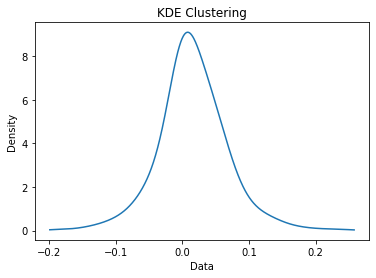

In [45]:
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt

kde = KernelDensity(bandwidth=0.02)  # Adjust the bandwidth parameter as needed
kde.fit(total_pop.reshape(-1, 1))

# Generate a set of points along the x-axis for plotting
x = np.linspace(total_pop.min(), total_pop.max(), 1000)  # Adjust the number of points as needed
x = x.reshape(-1, 1)
# Compute the log-density scores using the fitted KDE model
log_density = kde.score_samples(x)

# Visualize the clusters
plt.plot(x, np.exp(log_density))
plt.xlabel('Data')
plt.ylabel('Density')
plt.title('KDE Clustering')
plt.show()

# welp its a normal dist

In [217]:
import numpy as np

# Sort the data in ascending order
sorted_data = np.sort(total_pop)

# Calculate the quantiles for the three segments
quantiles = np.quantile(sorted_data, [1/3, 2/3])
# Divide the data based on the quantile thresholds
male_pop = sorted_data[sorted_data <= quantiles[0]]
neutral_pop = sorted_data[(sorted_data > quantiles[0]) & (sorted_data <= quantiles[1])]
female_pop = sorted_data[sorted_data > quantiles[1]]

In [102]:
th = 0.065
male_pop = total_pop[total_pop <= -th]
neutral_pop = total_pop[(total_pop > -th) & (total_pop < th)]
female_pop = total_pop[total_pop >= th]

In [103]:
male_pop.mean(), neutral_pop.mean(), female_pop.mean()

(-0.09868279146030545, 0.009189785902231937, 0.10206360072087815)

In [91]:
len(male_pop), len(female_pop), len(neutral_pop)

(1558, 3259, 1169)

In [24]:
np.median(total_pop)

0.008279383182525635

In [26]:
seperate_neutral = []

In [84]:
for s in data[(data.index.isin(male_related)) & (data.sexist == 0)].text:
    print(s)

I just don't trust an adult who uses coupons.
Apart from Ash and Robert, I'd pretty much forgotten about the rest of them. #MKR
Nimoy is not crate trained. Whelp. It's going to be a long night. http://t.co/unahvXKIsk
MENTION2279 bot fight
That main looked like it was very bland #MKR
EUUUUUUURGGGGH NOT AGAIN #MKR
I really hate when there is a kid commentator for grownups bball games
MENTION2759 w not v ;)
#katandandre to not score meals on their merits but say it's only fair you stay in the comp is a joke. Karma will come soon #cheats #mkr
Hey, MENTION174, thought you'd like to know a plagiarized version of one of your comics is going around with altered, offensive dialogue.
Entire article attached. RT MENTION3796: LOL http://t.co/eaJpCAIkIW
Making delish burritos with my boy :) #instafood #burrito #mkr https://t.co/vguY7VmZOH
Kat & Andre cartoon characters.Kat develop sportsmanship & Andre grow some muscles & take it like a boss! #MKR #cantcook http://t.co/9nd2gUHGH0
RT MENTION3316 I'm

In [92]:
data.sexist[male_related].value_counts()

0    1407
1     372
Name: sexist, dtype: int64

In [42]:
male_pop.max()

-0.10019059479236603

In [150]:
from scipy import stats

marked_rem = []

sigma = 0.01
for j, ind in enumerate(male_related):
    sample = female_sim[ind] - male_sim[ind]
    avg = np.average(sample)
    if avg > -sigma:
        neutral.append(ind)
        marked_rem.append(ind)
    # tstat, p = stats.ttest_1samp(np.array(sample), popmean=0)
    # if p > 0.05:
    #     neutral.append(ind)
    #     marked_rem.append(ind)

male_related = [i for i in male_related if i not in marked_rem]

c:\Python_VENVs\dtsci\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\Python_VENVs\dtsci\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


[]

In [87]:
(female_sim[1] - male_sim[1])

array([ 0.14523971,  0.042392  ,  0.00076479, -0.06188691,  0.06802807,
        0.01812786,  0.05783012,  0.05897139,  0.        ])

In [151]:
from scipy import stats

marked_rem2 = []

for j, ind in enumerate(female_related):
    sample = female_sim[ind] - male_sim[ind]
    avg = np.average(sample)
    if avg < sigma:
        neutral.append(ind)
        marked_rem2.append(ind)

    # tstat, p = stats.ttest_1samp(np.array(sample), popmean=neutral_pop.mean())
    # if p > 0.05:
        # neutral.append(ind)
        # marked_rem2.append(ind)

female_related = [i for i in female_related if i not in marked_rem2]

In [97]:
neutral_pop.mean()

-4.802675164082399e-06

In [152]:
data.sexist[male_related].value_counts()

0    663
1    249
Name: sexist, dtype: int64

In [153]:
data.sexist[female_related].value_counts()

1    1058
0     584
Name: sexist, dtype: int64

In [154]:
data.sexist[neutral].value_counts()

0    1753
1     502
Name: sexist, dtype: int64

In [87]:
1 - (471 + 348 + 866)/5000

0.663

In [23]:
from scipy import stats

sample = [
    0.4,
    0.01,
]
stats.ttest_1samp(np.array(sample), popmean=0)

Ttest_1sampResult(statistic=6.16153846153846, pvalue=0.0008386521298059162)

In [22]:
np.average(sample)

0.20500000000000002

In [75]:
neutral_pop.mean()

0.00735724240553862

In [4]:
from datasets import load_dataset, list_datasets

# for d in list_datasets(with_community_datasets=True):
#     if d == "md_gender_bias" : print("s")

In [34]:
data = load_dataset("md_gender_bias", "image_chat")
data.keys()

Found cached dataset md_gender_bias (C:/Users/Prashant(Gaz)/.cache/huggingface/datasets/md_gender_bias/image_chat/1.0.0/8ae77b51acf93383161cc954b146159291beca6c979b54ce228c46db86116c05)
100%|██████████| 3/3 [00:00<00:00, 12.32it/s]


dict_keys(['train', 'validation', 'test'])

In [35]:
import pandas as pd
total_data = pd.DataFrame(data["train"])
total_data
# 0 - female | 1 - male | 2 - gender neutral

,caption,id,male,female
0,<start> a young girl is holding a pink umbrell...,2923e28b6f588aff2d469ab2cccfac57,False,True
1,<start> a tall building with a clock on the si...,73a33823bb3e8ef618bf52f4b3147d,False,False
2,<start> a building that has a sign in front of...,e7a8a76ea32c1117dde5b93f2e18e,False,False
3,<start> a close up of a piece of food on a woo...,f3d0f4eb52e6ee38c8b9cef1b6272,False,False
4,<start> a couple of people standing next to ea...,29697d81476d0307376e7466f6ad48,False,False
...,...,...,...,...
9992,<start> a person sitting on a bench in the woo...,c2c4e3f8b8fc9571dbb526ed3a5bce,False,False
9993,<start> a group of men standing next to each o...,8ff8c1a9f9d35b53e3b2356651c93c46,True,False
9994,<start> a bunch of birds sitting on top of a t...,39c2bfe37704c10b63cb9b151d57e51,False,False
9995,<start> a group of people sitting at a table i...,3845d1b3b4973b2c499f2adbf7fa57,False,False


In [36]:
total_data = total_data.sample(n = 10_000)
total_data.ternary_label.value_counts()

ValueError: Cannot take a larger sample than population when 'replace=False'

In [37]:
total_data.rename(columns={"caption" : "text", "ternary_label" : "biased"}, inplace=True)
total_data

,text,id,male,female
0,<start> a young girl is holding a pink umbrell...,2923e28b6f588aff2d469ab2cccfac57,False,True
1,<start> a tall building with a clock on the si...,73a33823bb3e8ef618bf52f4b3147d,False,False
2,<start> a building that has a sign in front of...,e7a8a76ea32c1117dde5b93f2e18e,False,False
3,<start> a close up of a piece of food on a woo...,f3d0f4eb52e6ee38c8b9cef1b6272,False,False
4,<start> a couple of people standing next to ea...,29697d81476d0307376e7466f6ad48,False,False
...,...,...,...,...
9992,<start> a person sitting on a bench in the woo...,c2c4e3f8b8fc9571dbb526ed3a5bce,False,False
9993,<start> a group of men standing next to each o...,8ff8c1a9f9d35b53e3b2356651c93c46,True,False
9994,<start> a bunch of birds sitting on top of a t...,39c2bfe37704c10b63cb9b151d57e51,False,False
9995,<start> a group of people sitting at a table i...,3845d1b3b4973b2c499f2adbf7fa57,False,False


In [ ]:
total_data.iloc[1].caption

' a tall building with a clock on the side of it '

In [27]:
total_data[(total_data.male == True) & (total_data.female == True)]

,caption,id,male,female,bias
16,a man and a woman standing in front of a buil...,1834e9697b17b41589366eb7d18c61e,True,True,1
44,black and white photograph of a man and a wom...,cca16ee6a34e419cd2b87de45d1894e9,True,True,1
68,a bride and groom are posing for a p,a79dda894c9ce9c1b7729c3fa732fd,True,True,1
147,a man and a woman standing next to each other...,28e2bf6a4f64e0d8c797f0b8ba815b9,True,True,1
211,a man standing next to a woman holding a snow...,d54a3f75c4f8e055ae1a1387e67b64c,True,True,1
...,...,...,...,...,...
9818,a young woman holding a wii controller in a l...,9adbb487a7141d16303d90b75740668b,True,True,1
9867,a man and a woman standing next to a boat in ...,64edee287f1ef4c9e1e3dcedba11745,True,True,1
9968,a man and a woman drinking wine in a,9914782bda8ca787f18877f25c4b111b,True,True,1
9970,an image of a man and a woman on a cell,bc354c5939f7e49e6a3b01415edea55,True,True,1


In [8]:
total_data.caption = total_data.caption.apply(lambda x : x.replace("<start>", ""))
total_data.caption = total_data.caption.apply(lambda x : x.replace("<eos>", ""))

def assign_bias():
    bias = []
    for i in range(len(total_data)):
        male = total_data.iloc[i].male
        female = total_data.iloc[i].female

        if male and female:
            bias.append(3)
        elif male:
            bias.append(1)
        elif female:
            bias.append(0)
        else : bias.append(2)

    return bias

total_data["bias"] = assign_bias()
total_data

,caption,id,male,female,bias
0,a young girl is holding a pink umbrella in he...,2923e28b6f588aff2d469ab2cccfac57,False,True,0
1,a tall building with a clock on the side of it,73a33823bb3e8ef618bf52f4b3147d,False,False,2
2,a building that has a sign in front of a buil...,e7a8a76ea32c1117dde5b93f2e18e,False,False,2
3,a close up of a piece of food on a wooden table,f3d0f4eb52e6ee38c8b9cef1b6272,False,False,2
4,a couple of people standing next to each othe...,29697d81476d0307376e7466f6ad48,False,False,2
...,...,...,...,...,...
9992,a person sitting on a bench in the woods with...,c2c4e3f8b8fc9571dbb526ed3a5bce,False,False,2
9993,a group of men standing next to each other in...,8ff8c1a9f9d35b53e3b2356651c93c46,True,False,1
9994,a bunch of birds sitting on top of a tree,39c2bfe37704c10b63cb9b151d57e51,False,False,2
9995,a group of people sitting at a table in front...,3845d1b3b4973b2c499f2adbf7fa57,False,False,2


In [9]:
total_data.rename(columns={"caption" : "text", "bias" : "biased"}, inplace=True)

In [27]:
msam = mdgbias.sample(n = 6_500)
msam.ternary_label.value_counts()

2    3119
0    1777
1    1604
Name: ternary_label, dtype: int64

In [28]:
msam.index = np.arange(len(msam))
msam.rename(columns={"ternary_label" : "bias"}, inplace=True)
msam

,text,binary_label,binary_score,bias,ternary_score
0,"cool , what did you eat ? i love mcdonalds fre...",0,0.5656,2,0.7103
1,my day job is accounting .,1,0.6960,0,0.3389
2,i work in a firm as a lawyer .,1,0.7501,1,0.4114
3,like eggplants which is purple .,0,0.5925,2,0.4423
4,"hey , i was raised on a farm caring for animal...",0,0.6178,2,0.3714
...,...,...,...,...,...
6495,my family is italian so i cook a lot but i hat...,1,0.5596,2,0.4032
6496,oh okay i love to run i don't go to the gym much,1,0.6673,1,0.5299
6497,how are you doing today ?,1,0.5171,1,0.3955
6498,"that's a funny name for a dog , where did you ...",0,0.6531,2,0.4940


In [49]:
msam[msam.text.str.contains("pickle")]

,text,binary_label,binary_score,bias,ternary_score
442,i like pickles . they're really good . it was ...,0,0.6345,2,0.5516
1488,me too ! i've a tabby cat named pickles . what...,0,0.6611,2,0.6386
1841,"mr . pickles , but it might be too much work a...",1,0.8068,2,0.6447
3851,"i love mexican , the only thing i don't like i...",1,0.5000,2,0.5583
5853,i do not think my pickles would,0,0.7144,2,0.4886


In [161]:
import random
from nltk.tokenize import sent_tokenize

sentence_correlation = lambda s : (util.cos_sim(s, ts1emb) - util.cos_sim(s, ts2emb)).item()
n = random.choice(neutral)
row = msam[msam.index.isin(neutral)].iloc[n]
s = row.text
tokenized_sents = " ".join(sent_tokenize(str(s)))
svec = model.encode(tokenized_sents)
sscore = sentence_correlation(svec)
s, sscore, row.bias

('i should look into that . wish i could dance for a living . that is my passion',
 0.040072523057460785,
 0)

True

In [96]:
import spacy
nlp = spacy.load("en_core_web_md")

In [127]:
msam[msam.text == s]

,text,binary_label,binary_score,bias,ternary_score
102,"hello , how are you doing today ?",1,0.5453,0,0.3727
2278,"hello , how are you doing today ?",1,0.5453,0,0.3727
3221,"hello , how are you doing today ?",1,0.5453,0,0.3727
6151,"hello , how are you doing today ?",1,0.5453,0,0.3727


In [162]:
# import spacy
# nlp = spacy.load("en_core_web_md")

c1 = nlp("female").vector
c2 = nlp("male").vector

word_correlation = lambda wv : (util.cos_sim(wv, c1) - util.cos_sim(wv, c2)).item()

doc = nlp(s)
tbias = 0
lenn = 0
for token in doc:
    if token.pos_ == "ADJ" or token.pos_ == "VERB" or is_not_human_noun(token):
        word = token.text_with_ws
        bias = word_correlation(nlp(word).vector)
        tbias += bias
        lenn += 1
        print(word, bias)

tbias / lenn

look  0.005940109491348267
wish  0.0012331753969192505
dance  0.10044050216674805
living  0.04249104857444763
passion 0.10145677626132965


0.05031232237815857

In [86]:
def is_not_human_noun(token):
    if token.pos_ != 'NOUN':
        return False
    # Check if the token is a plural noun
    if token.tag_ == 'NNS':
        return False

    # Check if the token is a proper noun
    if token.tag_ == 'NNP':
        return False
    return True

In [198]:
import torch
from nltk.tokenize import sent_tokenize
sentence_correlation = lambda s : (util.cos_sim(s, ts1emb) - util.cos_sim(s, ts2emb)).item()

vt = []
sembeds = []

for i, s in enumerate(data.text):
    tokenized_sents = " ".join(sent_tokenize(str(s)))
    svec = model.encode(tokenized_sents)
    # cbias = 0
    # divfactor = 1
    # imp_vec = torch.zeros((384, ))
    # for vec in svec:
    #     sscore = sentence_correlation(vec)
    #     cbias += sscore
    #     imp_vec += vec
    
    # if svec.shape != (384, ): divfactor = len(svec)
    sscore = sentence_correlation(svec)
    finvec = np.array(svec)
    vt.append(sscore)
    sembeds.append(finvec)

In [262]:
from scipy.spatial.distance import minkowski

def calculate_minkowski_distance(embedding1, embedding2, p):
    return minkowski(embedding1, embedding2, p)

# Example usage
embedding1 = [0.1, 0.2, 0.3]
embedding2 = [0.4, 0.5, 0.6]
p = 2  # Order value for Minkowski distance (Euclidean distance)

distance = calculate_minkowski_distance(embedding1, embedding2, p)
print("Minkowski distance:", distance)

Minkowski distance: 0.5196152422706632


In [273]:
s1 = model.encode("female are bad driver")
s2 = model.encode("he crashed his car while driving")
s3 = model.encode("Men went for fishing yesterday")

util.cos_sim(s1, s2), util.cos_sim(s1, s3)

(tensor([[0.2782]]), tensor([[0.1042]]))

In [ ]:
import torch
from nltk.tokenize import sent_tokenize
sentence_correlation = lambda s : (minkowski(s, ts1emb) - minkowski(s, ts2emb)).item()

vt = []
sembeds = []

for i, s in enumerate(data.text):
    tokenized_sents = " ".join(sent_tokenize(str(s)))
    svec = model.encode(tokenized_sents)
    # cbias = 0
    # divfactor = 1
    # imp_vec = torch.zeros((384, ))
    # for vec in svec:
    #     sscore = sentence_correlation(vec)
    #     cbias += sscore
    #     imp_vec += vec
    
    # if svec.shape != (384, ): divfactor = len(svec)
    sscore = sentence_correlation(svec)
    finvec = np.array(svec)
    vt.append(sscore)
    sembeds.append(finvec)

In [237]:
male_related = []
female_related = []
neutral = []
paragraphs = []
# threshold = 0.01

# for i, b in enumerate(vt):
#     if b <= neu_sep:
#         male_related.append(i)
#     elif b > neu_sep and b < fem_sep : neutral.append(i)
#     else : female_related.append(i) 

boundary = 0.0025

for i, b in enumerate(vt):
    if abs(b) <= 0.07 + boundary:
        neutral.append(i)
    elif b < 0 : male_related.append(i)
    else : female_related.append(i)

In [200]:
len(male_related), len(female_related), len(neutral)

(22, 32, 49)

In [114]:
msam[msam.index.isin(neutral)].bias.value_counts()

2    2559
0    1207
1    1112
Name: bias, dtype: int64

In [117]:
neutind = np.array(msam[msam.index.isin(neutral)].index)

39.375

In [77]:
TargetSet1 = ["sister" , "female" , "woman" , "girl" , "daughter" , "she" , "hers" , "her"]
TargetSet2   = ["brother" , "male" , "man" , "boy" , "son" , "he" , "his" , "him"]  

c1 = np.zeros((300,), dtype=np.float32)
c2 = np.zeros((300,), dtype=np.float32)

for ts1, ts2 in zip(TargetSet1, TargetSet2):
    c1 = np.add(c1, nlp(ts1).vector)
    c2 = np.add(c2, nlp(ts2).vector)
    

c1 /= len(TargetSet1)
c2 /= len(TargetSet2)

In [203]:
# Analysis through word embeddings
import spacy
nlp = spacy.load("en_core_web_md")

# TargetSet1 = ["sister" , "female" , "woman" , "girl" , "daughter" , "she" , "hers" , "her"]
# TargetSet2   = ["brother" , "male" , "man" , "boy" , "son" , "he" , "his" , "him"]  

# c1 = np.zeros((300,), dtype=np.float32)
# c2 = np.zeros((300,), dtype=np.float32)

# for ts1, ts2 in zip(TargetSet1, TargetSet2):
#     c1 = np.add(c1, nlp(ts1).vector)
#     c2 = np.add(c2, nlp(ts2).vector)
    

# c1 /= len(TargetSet1)
# c2 /= len(TargetSet2)

# c1 = nlp("woman").vector
# c2 = nlp("man").vector

def is_not_human_noun(token):
    if token.pos_ != 'NOUN':
        return False
    # Check if the token is a plural noun
    if token.tag_ == 'NNS':
        return False

    # Check if the token is a proper noun
    if token.tag_ == 'NNP':
        return False
    return True

# text = '''There are more men in the army then women'''
doc = nlp(msam.iloc[male_related[21]].text)
for token in doc:
    if token.pos_ == "ADJ" or token.pos_ == "VERB" or is_not_human_noun(token):
        print(token.text_with_ws, "-", (util.cos_sim(nlp(token.text).vector, c1).item()))

    else : print("----------------->", token.text_with_ws, token.pos_)
male_sim = []
female_sim = []
w_emb = {}

for i, sent in enumerate(data.text):
    if (i % 1000 == 0) : print(i)
    doc = nlp(sent)
    msim = []
    fsim = []
    for token in doc:
        if token.pos_ == "ADJ" or token.pos_ == "VERB" or is_not_human_noun(token):
            # print(token.text_with_ws, "-", ())
            word = token.text_with_ws.strip()

            a = util.cos_sim(c1, nlp(word).vector)
            b = util.cos_sim(c2, nlp(word).vector)
            fsim.append(a.item())
            msim.append(b.item())

            if word in w_emb : continue
            bias = (a-b).item()
            # if word in w_emb:
            #     if (a-b).item() > abs(w_emb[word]):
            #         w_emb[word] = bias
            #         continue
            w_emb[word] = bias

    male_sim.append(np.array(msim))
    female_sim.append(np.array(fsim))

biased_words = list(w_emb.items())
biased_words.sort(key= lambda x : x[1])
biased_words

-----------------> that PRON
-----------------> 's  AUX
awesome  - 0.018433885648846626
-----------------> .  PUNCT
-----------------> do  AUX
-----------------> you  PRON
have  - 0.18806639313697815
-----------------> hobbies  NOUN
-----------------> ? PUNCT
0


[('prone', -0.05575805902481079),
 ('safe', -0.030868515372276306),
 ('resolving', -0.028350219130516052),
 ('healthy', -0.026880621910095215),
 ('improves', -0.02589668333530426),
 ('face', -0.025423094630241394),
 ('quick', -0.024478161707520485),
 ('enhances', -0.024058997631072998),
 ('problem', -0.023959994316101074),
 ('pay', -0.0213288776576519),
 ('stress', -0.01831492781639099),
 ('drive', -0.017900489270687103),
 ('necessary', -0.015901505947113037),
 ('handle', -0.015777550637722015),
 ('bias', -0.013852402567863464),
 ('natural', -0.013219565153121948),
 ('certain', -0.01070287823677063),
 ('balancing', -0.010687500238418579),
 ('balance', -0.010425984859466553),
 ('balanced', -0.009604543447494507),
 ('likely', -0.007311195135116577),
 ('ensure', -0.006290264427661896),
 ('eliminate', -0.005917727947235107),
 ('logical', -0.005885258316993713),
 ('seek', -0.005800798535346985),
 ('range', -0.004862546920776367),
 ('passive', -0.004675626754760742),
 ('provide', -0.00268049

In [274]:
data[" bias"][male_related].value_counts()

1    19
0     2
Name:  bias, dtype: int64

In [275]:
data[" bias"][female_related].value_counts()


1    26
0     4
Name:  bias, dtype: int64

In [276]:
data[" bias"][neutral].value_counts()


0    47
1     5
Name:  bias, dtype: int64

In [261]:
for s in data[data.index.isin(male_related)].text:
    doc = nlp(s)
    tbias = []
    for token in doc:
        if token.pos_ == "ADJ" or token.pos_ == "VERB" or is_not_human_noun(token):
            tbias.append(util.cos_sim(nlp(token.text).vector, c2).item())
    print(s, " | ", np.average(tbias))

Men are more logical and rational than women  |  0.19836705923080444
Men are more assertive and confident in the workplace  |  0.21237583955128989
Men are better at handling conflicts and difficult conversations  |  0.1674577941497167
Men are better at networking and building professional relationships  |  0.13968228548765182
Men are better at handling financial matters and making strategic decisions  |  0.12798630595207214
Men are more confident and authoritative in their communication styles  |  0.18621120850245157
Men are better at managing and resolving conflicts among team members  |  0.11379641853272915
Men are better suited for physically demanding roles in the workplace  |  0.21265916526317596
Employees should be recognized and rewarded based on their achievements and contributions  |  0.13902812947829565
Men are better at handling high-stress situations and making quick decisions  |  0.13726690007994571
Men are more suited for competitive work environments  |  0.17719155301650

In [257]:
for s in data[data.index.isin(female_related)].text:
    doc = nlp(s)
    tbias = []
    for token in doc:
        if token.pos_ == "ADJ" or token.pos_ == "VERB" or is_not_human_noun(token):
            tbias.append(util.cos_sim(nlp(token.text).vector, c1).item())
    print(s, " | ", np.max(tbias))

Women are not suited for leadership positions  |  0.25344741344451904
Women are too emotional to make objective decisions  |  0.30328258872032166
Women should focus on family rather than pursuing their careers  |  0.28504830598831177
Women are not as capable of handling high-pressure situations as men  |  0.2719881534576416
Women are not as ambitious as men  |  0.25566571950912476
Women lack the necessary skills for technology-related roles  |  0.2366729974746704
Women are not as detail-oriented as men  |  0.32450413703918457
Women lack the necessary drive and competitive spirit for success in the workplace  |  0.27587181329727173
Women are more likely to prioritize personal matters over professional commitments  |  0.3501625657081604
Women are not as effective at managing teams and driving productivity  |  0.23552101850509644
Women are less capable of taking risks and making bold decisions  |  0.2719881534576416
Women are less knowledgeable about technical subjects and innovations  | 

In [103]:
def is_not_human_noun(token):
    if token.pos_ != 'NOUN':
        return False
    # # Check if the token is a plural noun
    # if token.tag_ == 'NNS':
    #     return False

    # # Check if the token is a proper noun
    # if token.tag_ == 'NNP':
    #     return False
    return True

In [181]:
TargetSet1 = ["sister" , "female" , "woman" , "girl" , "daughter" , "she" , "hers" , "her", "women"]
TargetSet2   = ["brother" , "male" , "man" , "boy" , "son" , "he" , "his" , "him", "men"]  

c1 = np.zeros((300,), dtype=np.float32)
c2 = np.zeros((300,), dtype=np.float32)

for ts1, ts2 in zip(TargetSet1, TargetSet2):
    c1 = np.add(c1, nlp(ts1).vector)
    c2 = np.add(c2, nlp(ts2).vector)
    

c1 /= len(TargetSet1)
c2 /= len(TargetSet2)

In [174]:
c1 = nlp("women").vector
c2 = nlp("men").vector

In [182]:
# for s in data[data.index.isin(neutral)].text:
doc = nlp("Only a narrow range of emotion should be permitted to men")
tbias = []
for token in doc:
    # print(token.text_with_ws, token.pos_)
    if token.pos_ == "ADJ" or token.pos_ == "NOUN" or token.pos_ == "PRON":
        tbias.append(util.cos_sim(nlp(token.text).vector, c1).item() - util.cos_sim(nlp(token.text).vector, c2).item())
        print(token.text_with_ws, tbias[-1])
# print(doc.sents, " | ", np.max(tbias))

narrow  0.020415127277374268
range  0.05971522815525532
emotion  0.06452220678329468
men -0.08947700262069702


In [128]:
import pandas as pd
total_data = pd.read_excel("data/sexist_dataset_lb.xlsx")
# total_data.drop(columns=["Unnamed: 0"], inplace=True)
# total_data.sexist = total_data.sexist.apply(lambda x : 1 if x == True else 0)
total_data.rename(columns= {"Sentences" : "text", "label_sexist" : "biased"}, inplace=True)
# total_data = total_data[["text", "biased"]]
total_data

,text,Label
0,"For a woman, that is good",1
1,Just dress sexy and you will sign any contract.,1
2,Are you having period ?,1
3,Stop being bitchy,1
4,I leave early because of her children instead ...,1
...,...,...
1132,Opportunities are like night owls. They like t...,0
1133,It's not just a question of doing what you lov...,0
1134,A genius does what he masters. An ordinary man...,0
1135,If you want to know the real reasons behind th...,0


In [26]:
import pandas as pd
total_data = pd.read_csv("data/relations.csv")
# total_data.drop(columns=["Unnamed: 0"], inplace=True)
# total_data.sexist = total_data.sexist.apply(lambda x : 1 if x == True else 0)
total_data.rename(columns= {"Comment" : "text", "label_sexist" : "biased"}, inplace=True)
# total_data = total_data[["text", "biased"]]
total_data

,Unnamed: 0,Subreddit,text
0,135,relationships,"If you don't love his kid, he'll never love you."
1,143,relationships,The guy just sounds irrational to me. I know y...
2,231,relationships,How often do you talk with her? \n\n\nDecrease...
3,369,relationships,Some of the stuff I read on reddit left me con...
4,727,relationships,"""God damn my brilliant powers of reasoning and..."
...,...,...,...
6455,1402418,relationships,Also pull any money you have from joint accounts
6456,1403305,relationships,You do not need an explanation. You do need a ...
6457,1403379,relationships,Don't let yourself be treated this way. \n\nDo...
6458,1403684,relationships,"You are not married, no kids, nothing. So why ..."


In [10]:
total_data.biased.value_counts()

2    7226
1    1820
0     712
3     239
Name: biased, dtype: int64

In [176]:
for s in total_data[total_data.biased == "not sexist"].text:
    print(s)

I feel the same way Abortion's only 4 rape incest & the mother's life God bless South Carolina
What subreddits do Chads frequent? How do women impress Chads on Reddit, like do they just see a huge upvoted post and just immediately PM you and ask to fuck? Also, why do Chads need Reddit if they can just fuck whoever they want IRL?
I'm a blackpilled normie, getting laid doesn't magically change women nature. The blackpill is truth, looks are everything, anything besides looks is complementary.
Facebook instructing Gaza Muslims to bring guns, knives, infiltrate Israel en masse, invade nearby villages and kidnap Israelis ...[URL]
Yup, I remember when she said that. It amazes me that so many white women like her. Can you imagine... I hate to even think about it.
Girls really say "Ewww" and "fucking crazy or retarded?" Sorry, maybe sometimes but it sounds more like what a guy thinks girls say to me. (Or hopes)
I thought I had a chance,but got rejected quickly and even got rude looks...so i fe

In [3]:
import torch
from nltk.tokenize import sent_tokenize
sentence_correlation = lambda s : (util.cos_sim(s, ts1emb) - util.cos_sim(s, ts2emb)).item()

vt = []
sembeds = []

for i, s in enumerate(total_data.text):
    tokenized_sents = " ".join(sent_tokenize(str(s)))
    svec = model.encode(tokenized_sents)

    sscore = sentence_correlation(torch.tensor(svec, device = "cuda"))
    finvec = np.array(svec)
    vt.append(sscore)
    sembeds.append(finvec)

In [4]:
import numpy as np
# Sort the data in ascending order
sorted_data = np.sort(vt)
male_related = []
female_related = []
neutral = []

# Calculate the quantiles for the three segments
quantiles = np.quantile(sorted_data, [0.2, 0.8])
# Divide the data based on the quantile thresholds
for i, b in enumerate(vt):
  if b <= quantiles[0]:
    male_related.append(i)
  elif (b > quantiles[0]) & (b <= quantiles[1]):
    neutral.append(i)
  elif b > quantiles[1] : female_related.append(i)

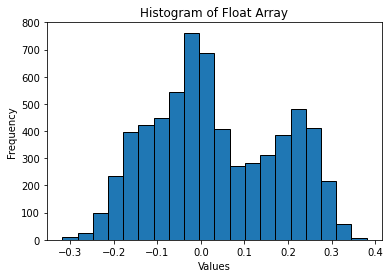

In [5]:
import matplotlib.pyplot as plt


# Plot histogram
plt.hist(vt, bins=20, edgecolor='black')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Float Array')

# Display the plot
plt.show()


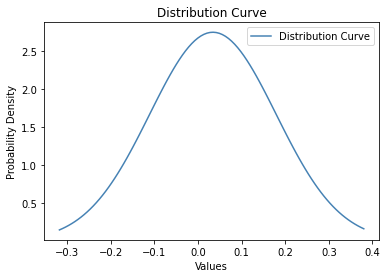

In [6]:
from scipy.stats import norm

plot_data = np.array(vt)
x = np.linspace(np.min(plot_data), np.max(plot_data), 100)
# Calculate the probability density function (PDF) of the plot_data
pdf = norm.pdf(x, np.mean(plot_data), np.std(plot_data))
# Plot the curve
plt.plot(x, pdf, color='steelblue', label='Distribution Curve')
plt.title('Distribution Curve')
plt.xlabel('Values')
plt.ylabel('Probability Density')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [31]:
embeds_main = [embeds[word].cpu().numpy() for word, b in biased_words[:100]]
embeds_main2 = [embeds[word].cpu().numpy() for word, b in biased_words[-100:]]

In [48]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity

# Assuming your vectors are stored in a numpy array called "vectors"
embeds_main = [embeds[word].cpu().numpy() for word, b in biased_words[:50]]
embeds_main2 = [embeds[word].cpu().numpy() for word, b in biased_words[-50:]]

embeds_main.extend(embeds_main2)

similarity_matrix = cosine_similarity(embeds_main)

# Specify the number of clusters you want to create
n_clusters = 2

# Perform K-means clustering
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(similarity_matrix)
cluster_labels = kmeans.labels_

In [8]:
vt = np.array(vt)
vt[cluster_labels[cluster_labels == 0]].mean(),\
vt[cluster_labels[cluster_labels == 1]].mean(),\
vt[cluster_labels[cluster_labels == 2]].mean(),

(-0.2149146944284439, -0.16512146592140198, 0.21420516073703766)

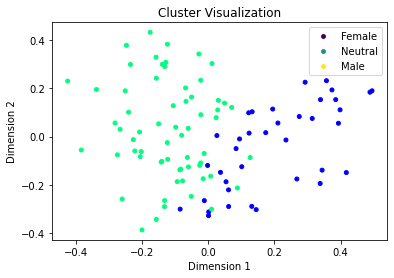

In [49]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(embeds_main)

# Scatter plot the reduced vectors with cluster assignments
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], c=cluster_labels, cmap=plt.cm.get_cmap('winter'), s=15.75)

# unique_labels = np.unique(cluster_labels)
unique_labels = ["Female", "Neutral", "Male"]
unique_colors = plt.cm.get_cmap('viridis')(np.linspace(0, 1, len(unique_labels)))

# Create a legend with cluster labels and colors
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label=f"{label}", markerfacecolor=color)
    for label, color in zip(unique_labels, unique_colors)
]
plt.legend(handles=legend_elements)

# Set plot title and labels
plt.title('Cluster Visualization')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()


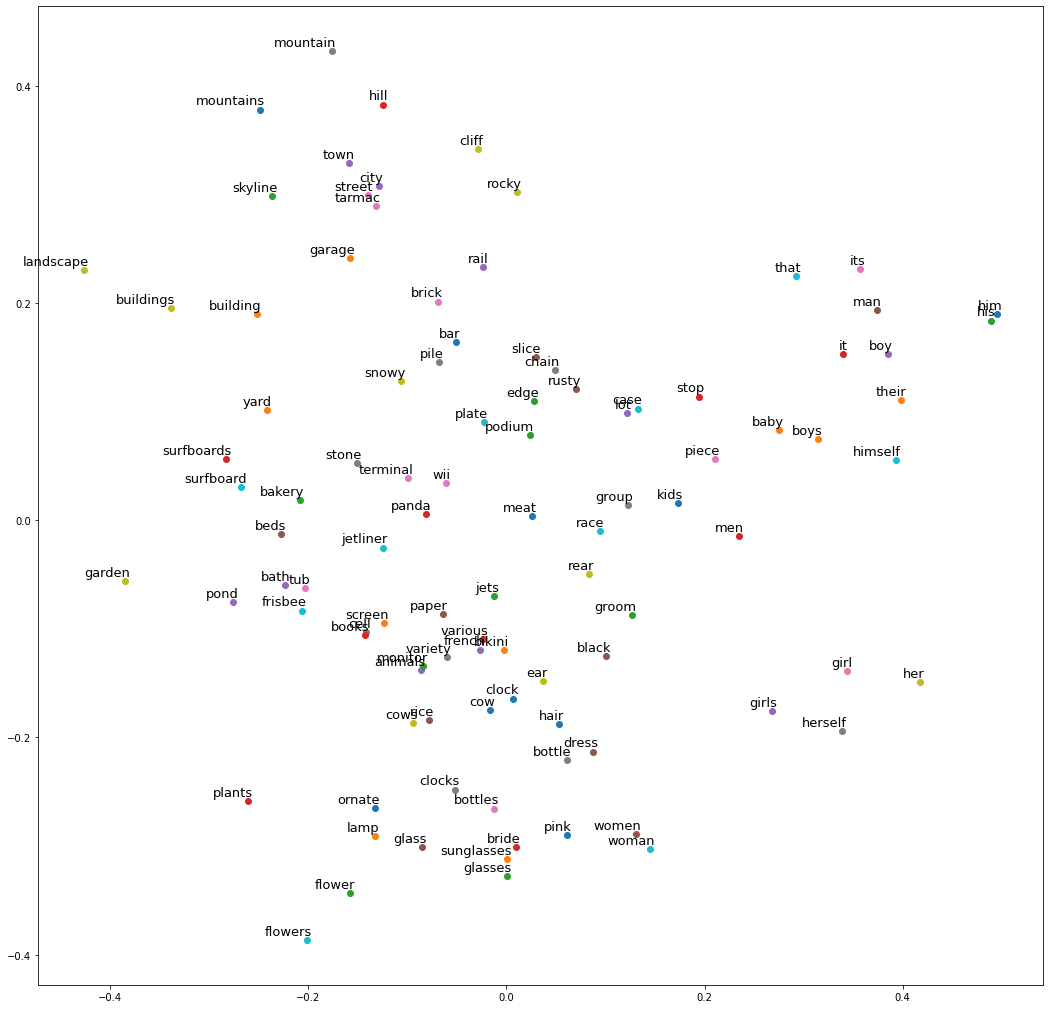

In [53]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# tsne_model = TSNE(n_components=2, n_iter=2500, random_state=42)
# tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
# new_values = tsne_model.fit_transform(topk_embed_select)
pca = PCA(n_components=2)
new_values = pca.fit_transform(embeds_main)

x = []
y = []
for value in new_values:
    x.append(value[0])
    y.append(value[1])

biaw_selec1 = [x for x in biased_words[:50]]
biaw_selec2 = [x for x in biased_words[-50:]] 
biaw_selec1.extend(biaw_selec2)

f = plt.figure(figsize=(18, 18)) 
for i in range(len(x)):
    plt.scatter(x[i],y[i])
    plt.annotate(biaw_selec1[i][0],
                    xy=(x[i], y[i]),
                    xytext=(5, 2),
                    textcoords='offset points',
                    ha='right',
                    va='bottom',
                    fontsize = 13)

# f.savefig("fig_relations.jpg")
plt.show()

In [35]:
total_data[total_data.index.isin(male_related)].biased.value_counts()

1    1728
2     250
3      23
0       1
Name: biased, dtype: int64

In [36]:
total_data[total_data.index.isin(female_related)].biased.value_counts()

2    1177
0     704
3     103
1       8
Name: biased, dtype: int64

In [37]:
total_data[total_data.index.isin(neutral)].biased.value_counts()

2    5799
3     113
1      84
0       7
Name: biased, dtype: int64

In [43]:
1 - (251 + 712 + 113 + 84)/10000

0.884

In [143]:
total_data.biased.value_counts()

1    1859
0    1428
Name: biased, dtype: int64

In [36]:
1- (391 + 122 + 1058)/len(total_data)

0.522056586553088

In [38]:
# Analysis through word embeddings
import spacy
nlp = spacy.load("en_core_web_md")

# c1 = nlp("woman").vector
# c2 = nlp("man").vector

TargetSet1 = ["sister" , "female" , "woman" , "women", "girl" , "daughter" , "she" , "hers" , "her"]
TargetSet2   = ["brother" , "male" , "man" , "men", "boy" , "son" , "he" , "his" , "him"]  

c1 = np.zeros((300,), dtype=np.float32)
c2 = np.zeros((300,), dtype=np.float32)

for ts1, ts2 in zip(TargetSet1, TargetSet2):
    c1 = np.add(c1, nlp(ts1).vector)
    c2 = np.add(c2, nlp(ts2).vector)
    

c1 /= len(TargetSet1)
c2 /= len(TargetSet2)

c1 = torch.tensor(c1, device="cuda")
c2 = torch.tensor(c2, device="cuda")

def is_not_human_noun(token):
    if token.pos_ != 'NOUN':
        return False
    # Check if the token is a plural noun
    if token.tag_ == 'NNS':
        return False

    # Check if the token is a proper noun
    if token.tag_ == 'NNP':
        return False
    return True

wbias = []
w_emb = {}
embeds = {}

for i, sent in enumerate(total_data.text):
    if (i % 1000 == 0) : print(i)
    try:
        doc = nlp(str(sent))
    except Exception as e:
        print(e)
        print(i)

    bias_list = []
    fsim = []
    for token in doc:
        if token.pos_ == "ADJ" or token.pos_ == "PRON" or token.pos_ == "NOUN":
            # print(token.text_with_ws, "-", ())
            word = token.text_with_ws.strip().lower()
            if word in w_emb :
                bias_list.append(w_emb[word])
                continue
            wv = torch.tensor(model.encode(word), device = "cuda")
            a = util.cos_sim(ts1emb, wv)
            b = util.cos_sim(ts2emb, wv)

            bias = (a-b).item()
            embeds[word] = wv
            bias_list.append(bias)
            # if word in w_emb:
            #     if (a-b).item() > abs(w_emb[word]):
            #         w_emb[word] = bias
            #         continue
            w_emb[word] = bias
    wbias.append(np.array(bias_list))

biased_words = list(w_emb.items())
biased_words.sort(key= lambda x : x[1])
# biased_words

0
1000
2000
3000
4000
5000
6000
7000
8000
9000


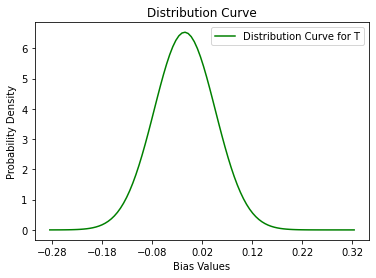

In [17]:
from scipy.stats import norm

plot_data = [b for _, b in biased_words]
x = np.linspace(np.min(plot_data), np.max(plot_data), 100)
# Calculate the probability density function (PDF) of the plot_data
pdf = norm.pdf(x, np.mean(plot_data), np.std(plot_data))
# Plot the curve
plt.plot(x, pdf, color='green', label='Distribution Curve for T')
plt.title('Distribution Curve')
plt.xlabel('Bias Values')
plt.ylabel('Probability Density')
plt.xticks(np.linspace(round(np.min(plot_data), 2), round(np.max(plot_data), 2), 7))
# Add a legend
plt.legend()

# Display the plot
plt.show()

In [9]:
total_pop = [b for _, b in biased_words]

In [13]:
len(biased_words)

548

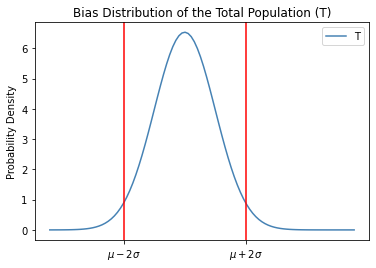

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

x = np.linspace(np.min(total_pop), np.max(total_pop), 100)

# Calculate the probability density function (PDF) of the total_pop
mu = np.mean(total_pop)
sigma = np.std(total_pop)

pdf = norm.pdf(x, mu, sigma)

# Plot the curve
plt.plot(x, pdf, color='steelblue', label='T')
plt.axvline(x=mu - 2 * sigma, color = "red")
plt.axvline(x=mu + 2 * sigma, color = "red")

plt.title('Bias Distribution of the Total Population (T)')
# plt.xlabel('Values')
plt.ylabel('Probability Density')
plt.xticks([mu - 2 * sigma, mu + 2 * sigma],[r"$\mu - 2\sigma$", r"$\mu + 2\sigma$"])
# Add a legend
plt.legend()

# Display the plot
plt.show()


In [13]:
mu - 2 * sigma, mu + 2 * sigma

(-0.12520772618267478, 0.0852664196408527)

In [16]:
import numpy as np

# Sort the data in ascending order
sorted_data = np.sort(total_pop)

# Calculate the quantiles for the three segments
quantiles = np.quantile(sorted_data, [0.06, 0.5, 0.92])
# Divide the data based on the quantile thresholds
male_pop = sorted_data[sorted_data <= quantiles[0]]
neutral_pop = sorted_data[(sorted_data > quantiles[0]) & (sorted_data <= quantiles[2])]
female_pop = sorted_data[sorted_data > quantiles[2]]

In [17]:
male_pop.mean(), neutral_pop.mean(), female_pop.mean()

(-0.12198810121282379, -0.0226441775225415, 0.08532847811338824)

In [72]:
male_pop.max(), female_pop.min()

(-0.09201790392398834, 0.04265645146369934)

[ 0.31435168 -0.07496533  0.05321459 -0.04048276 -0.12397619]


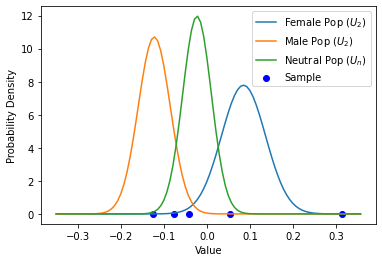

Likelihoods: [-16.174401844294046, -70.97995915913705, -47.266129655811184]
Best fit population: Female (Biased)
ask her. we don't know any more than you do.


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import random

# Example populations
# female_pop = np.random.normal(10, 2, 10000)  # Mean = 10, Standard Deviation = 2
# male_pop = np.random.normal(20, 3, 10000)  # Mean = 20, Standard Deviation = 3
# neutral_pop = np.random.normal(15, 4, 10000)  # Mean = 15, Standard Deviation = 4

# Example sample
# sample = np.array([18, 12, 14, 21, 16, 9, 11, 19])
n = random.randint(0, len(total_data))
# n = 3085	
# n = 155
sample = wbias[n]
# sample = tbias
print(sample)

# Calculate PDF for each population
x = np.linspace(np.min(total_pop), np.max(total_pop), 100)  # Range of values for x-axis
pdf1 = norm.pdf(x, np.mean(female_pop), np.std(female_pop))
pdf2 = norm.pdf(x, np.mean(male_pop), np.std(male_pop))
pdf3 = norm.pdf(x, np.mean(neutral_pop), np.std(neutral_pop))

# Plot PDFs
plt.plot(x, pdf1, label= r'Female Pop ($U_2$)')
plt.plot(x, pdf2, label=r'Male Pop ($U_2$)')
plt.plot(x, pdf3, label=r'Neutral Pop ($U_n$)')
# plt.hist(sample, density=True, alpha=0.5, label='Sample')  # Histogram of the sample (normalized)
plt.scatter(sample, np.zeros_like(sample), label='Sample', color='blue')  # Plot sample as individual total_data points
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

# # Calculate likelihoods for the sample
# likelihood1 = np.prod(norm.pdf(sample, np.mean(female_pop), np.std(female_pop)))
# likelihood2 = np.prod(norm.pdf(sample, np.mean(male_pop), np.std(male_pop)))
# likelihood3 = np.prod(norm.pdf(sample, np.mean(neutral_pop), np.std(neutral_pop)))

likelihood1 = np.sum((norm.logpdf(sample, np.mean(female_pop), np.std(female_pop))))
likelihood2 = np.sum((norm.logpdf(sample, np.mean(male_pop), np.std(male_pop))))
likelihood3 = np.sum((norm.logpdf(sample, np.mean(neutral_pop), np.std(neutral_pop))))

# Compare likelihoods
likelihoods = [likelihood1, likelihood2, likelihood3]
population_labels = ['Female (Biased)', 'Male (Biased)', 'Neutral']
best_fit_population = population_labels[np.argmax(likelihoods)]

print("Likelihoods:", likelihoods)
print("Best fit population:", best_fit_population)
# print(total_data.iloc[n].text, total_data.iloc[n].biased)
print(total_data.iloc[n].text)

In [64]:
total_data[total_data.text.str.contains("Men don't belong")]

,text,biased
155,Men don't belong in the kitchen,1


In [363]:
total_data.iloc[63]

text      girls shouldn't speak unless they are spoken t...
biased                                                    1
Name: 63, dtype: object

In [79]:
total_data.index = np.arange(len(total_data))

In [26]:
shift0 = []
shift1 = []
shift2 = []

for ind in range(len(total_data)):
    sample = wbias[ind]
    # Calculate likelihoods for the sample
    # likelihood1 = np.prod(norm.pdf(sample, np.mean(female_pop), np.std(female_pop)))
    # likelihood2 = np.prod(norm.pdf(sample, np.mean(male_pop), np.std(male_pop)))
    # likelihood3 = np.prod(norm.pdf(sample, np.mean(neutral_pop), np.std(neutral_pop)))
    likelihood1 = np.sum(np.log(norm.pdf(sample, np.mean(female_pop), np.std(female_pop))))
    likelihood2 = np.sum(np.log(norm.pdf(sample, np.mean(male_pop), np.std(male_pop))))
    likelihood3 = np.sum(np.log(norm.pdf(sample, np.mean(neutral_pop), np.std(neutral_pop))))

    # Compare likelihoods
    likelihoods = [likelihood1, likelihood2, likelihood3]
    population_labels = ['Population 0', 'Population 1', 'Population 2']
    best_fit_population = np.argmax(likelihoods)

    if best_fit_population == 2:
        shift2.append(ind)
    elif best_fit_population == 0 : shift0.append(ind)
    else : shift1.append(ind)

In [27]:
total_data[total_data.index.isin(shift1)].biased.value_counts()

,Unnamed: 0,Subreddit,text
0,135,relationships,"If you don't love his kid, he'll never love you."
1,143,relationships,The guy just sounds irrational to me. I know y...
8,2401,relationships,Yah. He said he took it down but it is still ...
9,2514,relationships,"Actually, I lived with my parents since i was ..."
12,2742,relationships,"Yikes. You haven't done anything to cause it,..."
...,...,...,...
6439,1399814,relationships,I'm gonna agree with the paintedlady318. This ...
6444,1400422,relationships,"Dude, you pushed him out of a window. How muc..."
6445,1400751,relationships,"He even says ""I'm an asshole, I know"", but I g..."
6452,1401601,relationships,"He didn't just not get tested, he lied and sai..."


In [28]:
total_data[total_data.index.isin(shift0)].biased.value_counts()

,Unnamed: 0,Subreddit,text
6,946,relationships,She's *hurting* you; how is that reasonable? \...
10,2559,relationships,You sound so apathetic is scares me. Please le...
11,2698,relationships,"""She"" and ""her"" are not a biological standpoin..."
17,3428,relationships,Maybe stay at a friend's house ?\n\nMaybe post...
19,3456,relationships,Have you thought about it this way...what if y...
...,...,...,...
6447,1401150,relationships,"Agreed, I feel a lot of the advice here is gea..."
6448,1401265,relationships,"Haha, poor OP! Maybe we should just both tag t..."
6450,1401392,relationships,Where the heck were these friends when she che...
6453,1401905,relationships,No you were not acting crazy at all. She was ...


In [32]:
total_data[total_data.index.isin(shift2)].biased.value_counts()

,Unnamed: 0,Subreddit,text
2,231,relationships,How often do you talk with her? \n\n\nDecrease...
3,369,relationships,Some of the stuff I read on reddit left me con...
4,727,relationships,"""God damn my brilliant powers of reasoning and..."
5,907,relationships,You could probably find a room on craigslist f...
7,1386,relationships,just for shits and giggles can we see a pictur...
...,...,...,...
6451,1401415,relationships,this is not a healthy relationship at all. do ...
6454,1402060,relationships,"Sadly, customers and clients are often a littl..."
6455,1402418,relationships,Also pull any money you have from joint accounts
6457,1403379,relationships,Don't let yourself be treated this way. \n\nDo...


In [34]:
for s in total_data[total_data.index.isin(shift1)].text:
    print(s)

If you don't love his kid, he'll never love you.
The guy just sounds irrational to me. I know you're awfully close to him by the way you're describing the situation, but can you imagine your life without having to worry about him? 
Yah.  He said he took it down but it is still there.  I'm hoping that it is a delay in the website.  Or it is possible he only deleted the app on his phone for now.  Regardless, I'm going to show him tonight that I can still pull it up... because he was confused about how it could say he was online when all he did was delete a notification.  So I need to show him that it says ONLINE TODAY.  
Actually, I lived with my parents since i was still young. Probably the best decision ever since it made it so much easier to leave him.

Yikes.  You haven't done anything to cause it, but it sounds like he feels as though he can't trust you.  To reiterate...this *isn't* about anything you've done.  He's paranoid and expressing that by being super controlling.  A therapi

In [121]:
total_data.biased.value_counts()

2    6313
1    2164
0    1523
Name: biased, dtype: int64

In [122]:
1 - (874 + 769 + 215 + 75 + 1720 + 322)/len(total_data)

0.6025

In [54]:
1 - (568 + 194 + 93 + 88 + 12)/10_000

0.9045

In [71]:
1 - (250 + 155 + 91 + 118 + 15)/10_000

0.9371

In [262]:
1 - (655 + 90)/len(total_data)

0.773349558868269

In [275]:
1 - (228 + 46)/len(total_data)     # ->  1137 comments dataset

0.7590149516270888

In [133]:
513 - 228 

285

In [127]:
467/513

0.9103313840155945

In [264]:
1769/1859

0.9515868746637978

In [116]:
1 - (196 + 109)/1137

0.731750219876869

In [349]:
1- (699 + 202)/len(total_data)

0.7258898691816246

In [22]:
1- (722 + 158)/len(total_data)

0.7322786735625191

In [50]:
706/(706 + 722)


0.4943977591036415

Below is the result of using t-test

In [147]:
total_data[total_data.index.isin(shift1)].biased.value_counts()


0    268
1     95
Name: biased, dtype: int64

In [148]:
total_data[total_data.index.isin(shift2)].biased.value_counts()

1    1764
0    1160
Name: biased, dtype: int64

In [496]:
total_data[total_data.index.isin(male_related)].biased.value_counts()

0    512
1    300
Name: biased, dtype: int64

In [41]:
1 - (759 + 183)/len(total_data) 

0.7134164891998783

In [79]:
import numpy as np
from scipy import stats

sample = wbias[n]
print(sample)
# Perform Kruskal-Wallis test
statistic, p_value = stats.ttest_1samp(sample, neutral_pop.mean())

# Print results
print("P-value:", p_value)


[-0.04005843 -0.04432733  0.23314753  0.01647811 -0.04432733]
P-value: 0.7602532392361363


In [75]:
n  # DONT CHANGE 1531, 496, 1213

1213

In [65]:
pd.DataFrame.to_csv(total_data, "data/bias3k.csv")

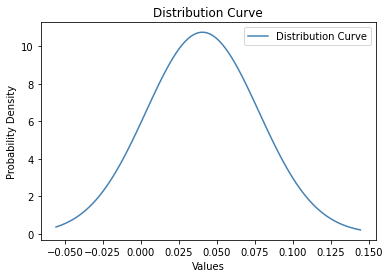

In [284]:
from scipy.stats import norm

plot_data = [b for _, b in biased_words]
x = np.linspace(np.min(plot_data), np.max(plot_data), 100)
# Calculate the probability density function (PDF) of the plot_data
pdf = norm.pdf(x, np.mean(plot_data), np.std(plot_data))
# Plot the curve
plt.plot(x, pdf, color='steelblue', label='Distribution Curve')
plt.title('Distribution Curve')
plt.xlabel('Values')
plt.ylabel('Probability Density')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [296]:
th = 0.01
plot_data = np.array(plot_data)
male_pop = plot_data[plot_data <= -th]
neutral_pop = plot_data[(plot_data > -th) & (plot_data < th)]
female_pop = plot_data[plot_data >= th]

In [297]:
neutral_pop.mean()

0.0016439477913081646

In [146]:
shift1 = []
shift2 = []

for ind in range(len(vt)):
    sample = wbias[ind]
    tstat, p = stats.ttest_1samp(np.array(sample), popmean=neutral_pop.mean())
    if p > 0.05:
        shift2.append(ind)

    else : shift1.append(ind)

c:\Python_VENVs\dtsci\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Python_VENVs\dtsci\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\PRASHA~1\AppData\Local\Temp/ipykernel_1280/942954947.py:6: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  tstat, p = stats.ttest_1samp(np.array(sample), popmean=neutral_pop.mean())
c:\Python_VENVs\dtsci\lib\site-packages\scipy\stats\_stats_py.py:1250: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
c:\Python_VENVs\dtsci\lib\site-packages\scipy\stats\_stats_py.py:1250: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to 

In [29]:
w1 = model.encode("giraffe")
w2 = model.encode("cow")
w3 = model.encode("men")
util.cos_sim(torch.tensor(w1, device="cuda"), ts2emb)

tensor([[0.2012]], device='cuda:0')

In [30]:
1 - (20_000 + 9500)/338_000

0.9127218934911243

In [221]:
from scipy import stats

marked_rem3 = []
biased_both = []

for j, ind in enumerate(neutral):
    sample = female_sim[ind] - male_sim[ind]
    if len(sample) == 0 : continue
    minn = min(sample)
    maxx = max(sample)
    if abs(maxx) < abs(minn) and minn <= -0.1:
        marked_rem3.append(ind)
        male_related.append(ind)
    elif abs(maxx) > abs(minn) and maxx >= 0.1:
        marked_rem3.append(ind)
        female_related.append(ind)
    elif abs(maxx) == abs(minn) and abs(maxx) >= 0.1:
        biased_both.append(ind)
        marked_rem3.append(ind)

    # avg = np.average(sample)
    # if abs(avg) >= 0.0975:
    #     if avg < 0 : male_related.append(ind)
    #     else : female_related.append(ind)
        
    #     marked_rem3.append(ind)

    # tstat, p = stats.ttest_1samp(np.array(sample), popmean=neutral_pop.mean())
    # if p > 0.05:
        # neutral.append(ind)
        # marked_rem3.append(ind)

neutral = [i for i in neutral if i not in marked_rem3]

In [232]:
from scipy import stats

marked_rem = []

sigma = 0.01
for j, ind in enumerate(male_related):
    sample = female_sim[ind] - male_sim[ind]
    avg = np.average(sample)
    if avg > -sigma:
        neutral.append(ind)
        marked_rem.append(ind)
    # tstat, p = stats.ttest_1samp(np.array(sample), popmean=0)
    # if p > 0.05:
    #     neutral.append(ind)
    #     marked_rem.append(ind)

male_related = [i for i in male_related if i not in marked_rem]
from scipy import stats

marked_rem2 = []

for j, ind in enumerate(female_related):
    sample = female_sim[ind] - male_sim[ind]
    avg = np.average(sample)
    if avg < sigma:
        neutral.append(ind)
        marked_rem2.append(ind)

    # tstat, p = stats.ttest_1samp(np.array(sample), popmean=neutral_pop.mean())
    # if p > 0.05:
        # neutral.append(ind)
        # marked_rem2.append(ind)

female_related = [i for i in female_related if i not in marked_rem2]

0 - Female , 1 - Male and 2 - Neutral   | md_gender_bias

In [190]:
for i, s in enumerate(msam[msam.index.isin(male_related)].text):
    print(s, msam[msam.index.isin(male_related)].iloc[i].bias)

next time i am in church , i will keep you and your hobbies in my prayers lol 0
hello . making out lesson plans for next week . 1
portland , or where i live in an attic and my brother lives as a viking 2
i will call someone who can help you ! 2
hi 2
i think anyone can , do you live in the city 2
i have played spades and uno . both pretty fun . 2
oh yes , i feel very bad for those affected 1
i am so very very tired 0
great band . i hope all feel better and get those meds 1
wow ok you sould smart 0
yeah . it can . just let them get use to each other day by day . whud 0
i feel your pain , just run for the hills man . 1
naw , i would rather hike all day long than spend an hour in the gym . 1
speaking of hounddogs i've 3 suppers 2
that is good to have a hobby 1
the newspaper , you tell me ? 1
i need a job my mom and dad pays my rent 2
i do not have time for the gym i can only hike on weekends . 1
my unemployed boyfriend likes to do that too 1
hello there , albert here . whats going on for y

In [110]:
sem = model.encode(""""oh so your father does 3d models as well i am guessing ?""")
util.cos_sim(sem, ts1emb) - util.cos_sim(sem, ts2emb)

tensor([[-0.0760]])

In [280]:
doc = nlp("Inclusion Criteria:  Any willing subject who meets the male gender requirements, who is competent, agrees to participate, and is able to understand the consent form.  Exclusion Criteria:  Not sepcified.")
summ = 0

TargetSet1 = ["sister", "female", "women", "girl", "daughter", "she", "hers", "her"]
TargetSet2 = ["brother", "male", "men", "boy", "son", "he", "his", "him"]

c1 = np.zeros((300,), dtype=np.float32)
c2 = np.zeros((300,), dtype=np.float32)

for ts1, ts2 in zip(TargetSet1, TargetSet2):
    c1 = np.add(c1, nlp(ts1).vector)
    c2 = np.add(c2, nlp(ts2).vector)


c1 /= len(TargetSet1)
c2 /= len(TargetSet2)

sample = []

for token in doc:
    if token.pos_ == "ADJ" or token.pos_ == "PRON" or token.pos_ == "NOUN":
        WV = torch.tensor(model.encode(token.text_with_ws), device="cuda")
        print(
            token.text_with_ws,
            "=>  ",
            (
                util.cos_sim(WV, ts1emb).item()
                - util.cos_sim(WV, ts2emb).item()
            ),
            token.pos_
        )
        sample.append(
            util.cos_sim(WV, ts1emb).item()
            - util.cos_sim(WV, ts2emb).item()
        )

    else:
        print("----------------->", token.text_with_ws, token.pos_)

summ / 4


-----------------> Inclusion  PROPN
-----------------> Criteria PROPN
-----------------> :  PUNCT
----------------->   SPACE
-----------------> Any  DET
willing  =>   -0.03424185514450073 ADJ
subject  =>   -0.009980753064155579 NOUN
who  =>   -0.025160878896713257 PRON
-----------------> meets  VERB
-----------------> the  DET
male  =>   -0.24732917547225952 ADJ
gender  =>   0.02962520718574524 NOUN
requirements =>   0.04051198810338974 NOUN
-----------------> ,  PUNCT
who  =>   -0.025160878896713257 PRON
-----------------> is  AUX
competent =>   0.007392764091491699 ADJ
-----------------> ,  PUNCT
-----------------> agrees  VERB
-----------------> to  PART
-----------------> participate VERB
-----------------> ,  PUNCT
-----------------> and  CCONJ
-----------------> is  AUX
able  =>   -0.019883453845977783 ADJ
-----------------> to  PART
-----------------> understand  VERB
-----------------> the  DET
consent  =>   0.024163752794265747 NOUN
form =>   -0.0811358392238617 NOUN
---------

0.0

In [201]:
import numpy as np

def cosine_similarity(word_vector1, word_vector2):
  """
  Calculates the cosine similarity between two word vectors.
  """
  # print(word_vector1.shape, word_vector2.shape)
  dot_product = np.dot(word_vector1, word_vector2)
  wv1_mag = np.linalg.norm(word_vector1)
  wv2_mag = np.linalg.norm(word_vector2)
  sim = dot_product / (wv1_mag * wv2_mag)

  return sim

In [212]:
import numpy as np
import gensim.downloader as api
from packaging import version

class Embedder:
    def __init__(self, model_name = "glove-wiki-gigaword-200", gensim_version = "4.3.1") -> None:
        self._model = api.load(model_name)
        self._version = gensim_version

    def word_vector(self, word:str) -> np.ndarray:
        embedding = np.zeros(200)
        if version.parse(self._version) >= version.parse("4.0.0"):
            if word in self._model.index_to_key:
                embedding = self._model[word]
                return embedding
        try:
            if word in self._model.vocab:
                embedding = self._model[word]
                return embedding

        except Exception as e:
            print(e)
        
        return embedding

global_embedding = Embedder()

TargetSet1 = ["women", "girl", "daughter", "she", "hers", "her"]
TargetSet2 = ["men", "boy", "son", "he", "his", "him"]

c1 = np.zeros((200,), dtype=np.float32)
c2 = np.zeros((200,), dtype=np.float32)

for ts1, ts2 in zip(TargetSet1, TargetSet2):
    c1 = np.add(c1, global_embedding.word_vector(ts1))
    c2 = np.add(c2, global_embedding.word_vector(ts2))

c1 /= len(TargetSet1)
c2 /= len(TargetSet2)

sample = []


In [220]:
util.cos_sim(model.encode("male"), ts2emb).item()

0.5349545478820801

[-0.03424185514450073, -0.009980753064155579, -0.025160878896713257, -0.24732917547225952, 0.02962520718574524, 0.04051198810338974, -0.025160878896713257, 0.007392764091491699, -0.019883453845977783, 0.024163752794265747, -0.0811358392238617]


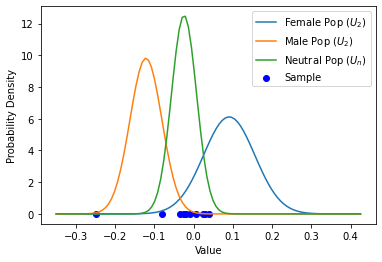

Likelihoods: [-6.7381828252985585, -21.1593848379581, -3.6504386287163975]
Best fit population: Neutral



In [282]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import random

# Example populations
# female_pop = np.random.normal(10, 2, 10000)  # Mean = 10, Standard Deviation = 2
# male_pop = np.random.normal(20, 3, 10000)  # Mean = 20, Standard Deviation = 3
# neutral_pop = np.random.normal(15, 4, 10000)  # Mean = 15, Standard Deviation = 4

# Example sample
# sample = np.array([18, 12, 14, 21, 16, 9, 11, 19])
# n = random.randint(0, len(vt))
# n = 3085	
# n = 155
# sample = wbias[n]
# sample = tbias
print(sample)

# Calculate PDF for each population
x = np.linspace(np.min(total_pop), np.max(total_pop), 100)  # Range of values for x-axis
pdf1 = norm.pdf(x, np.mean(female_pop), np.std(female_pop))
pdf2 = norm.pdf(x, np.mean(male_pop), np.std(male_pop))
pdf3 = norm.pdf(x, np.mean(neutral_pop), np.std(neutral_pop))

# Plot PDFs
plt.plot(x, pdf1, label= r'Female Pop ($U_2$)')
plt.plot(x, pdf2, label=r'Male Pop ($U_2$)')
plt.plot(x, pdf3, label=r'Neutral Pop ($U_n$)')
# plt.hist(sample, density=True, alpha=0.5, label='Sample')  # Histogram of the sample (normalized)
plt.scatter(sample, np.zeros_like(sample), label='Sample', color='blue')  # Plot sample as individual total_data points
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

# # Calculate likelihoods for the sample
# likelihood1 = np.prod(norm.pdf(sample, np.mean(female_pop), np.std(female_pop)))
# likelihood2 = np.prod(norm.pdf(sample, np.mean(male_pop), np.std(male_pop)))
# likelihood3 = np.prod(norm.pdf(sample, np.mean(neutral_pop), np.std(neutral_pop)))

likelihood1 = np.sum((norm.logpdf(sample, np.mean(female_pop), np.std(female_pop))))
likelihood2 = np.sum((norm.logpdf(sample, np.mean(male_pop), np.std(male_pop))))
likelihood3 = np.sum((norm.logpdf(sample, np.mean(neutral_pop), np.std(neutral_pop))))

# Compare likelihoods
likelihoods = [likelihood1, likelihood2, likelihood3]
population_labels = ['Female (Biased)', 'Male (Biased)', 'Neutral']
best_fit_population = population_labels[np.argmax(likelihoods)]

print("Likelihoods:", likelihoods)
print("Best fit population:", best_fit_population)
print()
# print(total_data.iloc[n].text, total_data.iloc[n].biased)

In [46]:
sample

[0.11265519261360168, 0.018470853567123413, 0.1452397108078003]

In [190]:
female_sim[neutral[42]]

array([], dtype=float64)

In [179]:
util.cos_sim(nlp("father").vector, c1).item() - util.cos_sim(nlp("father").vector, c2).item()

-0.10573726892471313

In [147]:
util.cos_sim(sem, ts1e).item() - util.cos_sim(sem, ts2e).item()

-0.0930679440498352

In [89]:
from scipy import stats

marked_rem3 = []

sigma = 0.05
for ind, b in enumerate(neutral):
    sample = female_sim[ind] - male_sim[ind]
    tstat1, p1 = stats.ttest_1samp(np.array(sample), popmean=female_pop.mean())
    tstat1, p2 = stats.ttest_1samp(np.array(sample), popmean=male_pop.mean())
    if (p1 < sigma and p2 < sigma):
        # neutral.append(ind)
        continue
    
    elif (p1 > sigma and p2 > sigma):
        if p1 > p2: female_related.append(ind)
        elif p1 < p2 : male_related.append(ind)

    elif p1 > sigma:
        female_related.append(ind)
    
    elif p2 > sigma:
        male_related.append(ind)
    
    marked_rem3.append(ind)
    


C:\Users\PRASHA~1\AppData\Local\Temp/ipykernel_26488/1567710384.py:8: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  tstat1, p1 = stats.ttest_1samp(np.array(sample), popmean=female_pop.mean())
C:\Users\PRASHA~1\AppData\Local\Temp/ipykernel_26488/1567710384.py:9: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  tstat1, p2 = stats.ttest_1samp(np.array(sample), popmean=male_pop.mean())


In [90]:
neutral = [i for i in neutral if i not in marked_rem3]


In [91]:
data.sexist[neutral].value_counts()

0    2795
1     265
Name: sexist, dtype: int64

In [92]:
data.sexist[female_related].value_counts()

0    2056
1     784
Name: sexist, dtype: int64

In [93]:
data.sexist[male_related].value_counts()

0    1785
1     219
Name: sexist, dtype: int64

In [41]:
male_data = data[data.index.isin(male_related)]

In [51]:
import random
n = random.randint(0, len(data))

st = model.encode(data.iloc[n].text)
ts1 = model.encode("men")
ts2 = model.encode("women")
print(data.iloc[n].text, data.iloc[n].sexist)
util.cos_sim(ts1, st), util.cos_sim(ts2, st), util.cos_sim(ts1, st)-util.cos_sim(ts2, st)

Women are more vulnerable than men are True


(tensor([[0.4276]]), tensor([[0.5264]]), tensor([[-0.0988]]))

In [36]:
1 - (4629 + 2422 + 312)/13170

0.4409263477600608

In [20]:
for i, s in enumerate(data.Sentences[female_related]):
    if int(data.Label[female_related].iloc[i]) == 0:
        print(s, data.Label[female_related].iloc[i])

Women can do anything a man can 0
You are a professional women 0
All candidates are accepted. 0
This outfit suits you well. 0
Great job! 0
Both women and a men leadership can exist 0
Gender diversity is a key to good performance 0
Women first ! 0
Women and men can collaborate in any situation 0
This project can be led by a woman just like a man 0
Women and men can share the same vision 0
Gender equality at work is a matter of respect 0
Women are educated 0
Women are able to choose their own life goals 0
Gender equality is good for companies 0
Women are equal to men 0
Women can work as much as men. 0
My colleague is an amazing person 0
Women and men can be fired if they don't work. 0
Skills are more important that gender 0
Women can access any position 0
Women and men can have divergent thoughts 0
Women and men have the same amount of working time 0
Women and men should always be well dressed. 0
Women understand men. 0
Women and men can have a similar career. 0
We are all equal. 0
Wow, 

In [21]:
data.iloc[49]

Sentences    Everybody here is competent
Label                                  0
Name: 49, dtype: object